# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 2

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [5]:
# Número de linhas e colunas
df.shape

(313687, 27)

In [6]:
# Informações dos dados nome das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [7]:
# Resumo Estatístico
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


## Número de veículos pertencentes a cada marca

In [18]:
# Contagem de Veículos por Marca
brand = df['brand']
brand = brand.value_counts()
brand

volkswagen        66980
opel              36158
bmw               32630
mercedes_benz     28692
audi              25214
ford              22728
renault           16387
peugeot           10257
fiat               8363
seat               5607
mazda              5210
citroen            4638
skoda              4626
smart              4566
nissan             4446
toyota             4020
hyundai            3170
volvo              3050
sonstige_autos     3012
mitsubishi         2831
honda              2528
kia                2188
alfa_romeo         2069
suzuki             2051
mini               1797
chevrolet          1578
chrysler           1339
porsche             839
dacia               790
daihatsu            774
jeep                713
subaru              689
land_rover          602
trabant             573
daewoo              513
saab                507
rover               458
jaguar              443
lancia              435
lada                216
Name: brand, dtype: int64

Text(0.5, 1.0, 'Veículos por Marca')

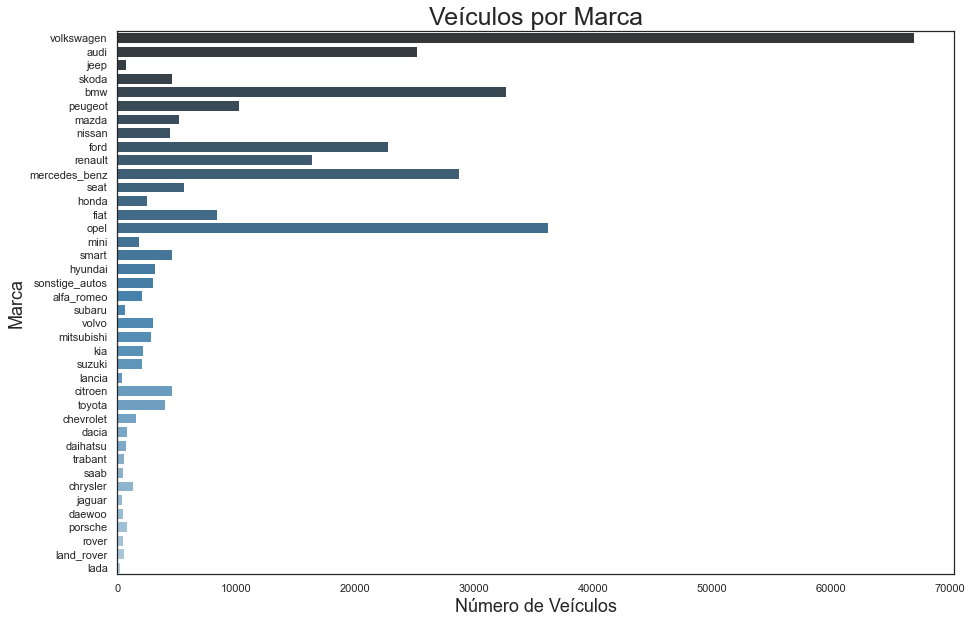

In [40]:
f, ax = plt.subplots(figsize=(15,10))
fig = sns.countplot(y='brand', data=df, palette='Blues_d')
ax.xaxis.set_label_text('Número de Veículos', fontdict={'size':18})
ax.yaxis.set_label_text('Marca', fontdict={'size':18})
ax.set_title('Veículos por Marca', fontdict={'size':25})

In [41]:
# Salvando o plot
plt.savefig('veiculos_por_marca.png', format='png')

<Figure size 432x288 with 0 Axes>

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

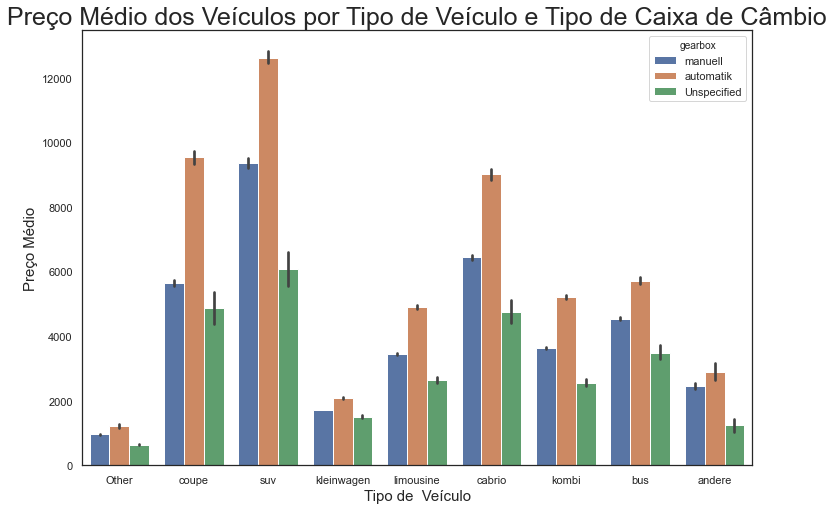

In [60]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
f, ax = plt.subplots(figsize=(12,8))
fig = sns.barplot(x='vehicleType', y='price', hue='gearbox', data=df)
ax.xaxis.set_label_text('Tipo de  Veículo', fontdict={'size':15})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size':15})
ax.set_title('Preço Médio dos Veículos por Tipo de Veículo e Tipo de Caixa de Câmbio', fontdict={'size':25})
plt.show()

In [61]:
# Salvando o plot
plt.savefig('preco_medio_veiculo_cambio.png', format='png')

<Figure size 432x288 with 0 Axes>

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>